# Documentation User Segmentation_Labs_

## Library

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn import cluster, tree, decomposition
from sklearn.preprocessing import RobustScaler

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## Import Dataset

Import **User Table**

In [ ]:
!gdown --id '1BwOrcqmsDl-A_U9KU-7wrhOhv52uPAIB'

df_user = pd.read_csv('/content/user_clean.csv')
df_user

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BwOrcqmsDl-A_U9KU-7wrhOhv52uPAIB
To: /content/user_clean.csv
100% 137k/137k [00:00<00:00, 55.8MB/s]


,Unnamed: 0,user_id,register_date,name,gender,province,city
0,0,10088,2019-11-09,Mustika Dabukke,male,Jawa Barat,Bandung
1,1,10089,2019-11-13,Luluh Prayoga,male,Jawa Barat,Bandung
2,2,10101,2019-01-26,Mulyono Napitupulu,male,Jawa Barat,Bandung
3,3,10129,2020-01-06,Gandewa Napitupulu,male,Jawa Barat,Bandung
4,4,10132,2019-04-10,Nrima Wahyudin,male,Jawa Barat,Bandung
...,...,...,...,...,...,...,...
1997,1997,20631,2019-03-15,Rahmi Jessica Yolanda S.Kom,female,Banten,Tangerang
1998,1998,20636,2019-01-29,Ami Haryanti,female,Banten,Tangerang
1999,1999,20639,2019-07-08,Ina Prastuti,female,Banten,Tangerang
2000,2000,20660,2019-06-05,Violet Safitri,female,Banten,Tangerang


Import **Transaction Table**

In [ ]:
!gdown --id '1HcKf_2zJ_7owb5vNt8GFwZHERxQP0p1h'

df_tra = pd.read_csv('/content/transaction_clean.csv')
df_tra

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HcKf_2zJ_7owb5vNt8GFwZHERxQP0p1h
To: /content/transaction_clean.csv
100% 1.60M/1.60M [00:00<00:00, 107MB/s]


,Unnamed: 0,event_id,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher,voucher_id,voucher_amount,original_amount,paid_amount,date,time
0,0,273372,complete,2021-09-25 18:59:17,11114,4,107962,False,NaN,0,6000000,6000000,2021-09-25,18:59:17
1,1,246410,complete,2021-04-17 09:46:36,11229,2,109182,False,NaN,0,6000000,6000000,2021-04-17,09:46:36
2,2,208918,cancelled,2020-10-03 10:46:13,11251,3,109447,False,NaN,0,6000000,6000000,2020-10-03,10:46:13
3,3,266488,complete,2021-08-18 12:34:51,11277,4,109765,False,NaN,0,6000000,6000000,2021-08-18,12:34:51
4,4,135632,complete,2019-09-07 10:21:10,20631,2,114778,False,NaN,0,6000000,6000000,2019-09-07,10:21:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15538,15538,267322,complete,2021-08-23 06:26:05,20082,2,110552,True,3.0,25000,30000,5000,2021-08-23,06:26:05
15539,15539,236079,complete,2021-02-05 20:22:31,20121,3,110789,True,3.0,25000,30000,5000,2021-02-05,20:22:31
15540,15540,133130,complete,2019-08-20 14:49:29,20165,3,111067,True,3.0,25000,30000,5000,2019-08-20,14:49:29
15541,15541,153776,cancelled,2019-12-10 12:05:37,20232,2,111504,True,3.0,25000,30000,5000,2019-12-10,12:05:37


Import **Transaction Item Table**

In [ ]:
!gdown --id '1o5HbcNYl4Yu7hOOG2HfZRPyenm9GC2pi'

df_trait = pd.read_csv('/content/transaction_item_clean.csv')
df_trait

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1o5HbcNYl4Yu7hOOG2HfZRPyenm9GC2pi
To: /content/transaction_item_clean.csv
100% 1.94M/1.94M [00:00<00:00, 99.8MB/s]


,Unnamed: 0,transaction_item_id,transaction_id,event_id,user_id,event_name,timestamp_event,payment_method_id,product_id,qty,price,original_amount,date,time
0,0,1000191,100019,250933,10003,complete,2021-05-15 22:32:40,4,10000,8,100000,800000,2021-05-15,22:32:40
1,1,1002601,100260,161076,10041,complete,2020-01-15 17:17:58,2,10000,8,100000,800000,2020-01-15,17:17:58
2,2,1008021,100802,117276,10136,complete,2019-05-15 13:45:08,2,10000,8,100000,800000,2019-05-15,13:45:08
3,3,1019601,101960,223154,10326,complete,2020-11-30 07:27:28,3,10000,8,100000,800000,2020-11-30,07:27:28
4,4,1037631,103763,217942,10620,cancelled,2020-11-09 13:39:20,2,10000,8,100000,800000,2020-11-09,13:39:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18238,18238,1153011,115301,251662,20679,complete,2021-05-20 11:50:38,3,20080,1,3000000,3000000,2021-05-20,11:50:38
18239,18239,1153401,115340,165372,20683,complete,2020-02-09 22:40:04,5,20080,1,3000000,3000000,2020-02-09,22:40:04
18240,18240,1153661,115366,254850,20685,complete,2021-06-13 10:48:42,2,20080,1,3000000,3000000,2021-06-13,10:48:42
18241,18241,1154091,115409,264132,20688,complete,2021-08-05 21:14:31,1,20080,1,3000000,3000000,2021-08-05,21:14:31


## Merge Data

Join **User and Transaction Table**

In [ ]:
df_user_tra = df_tra.merge(df_user, how = 'inner', on='user_id')
df_user_tra

,Unnamed: 0_x,event_id,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher,voucher_id,voucher_amount,original_amount,paid_amount,date,time,Unnamed: 0_y,register_date,name,gender,province,city
0,0,273372,complete,2021-09-25 18:59:17,11114,4,107962,False,NaN,0,6000000,6000000,2021-09-25,18:59:17,1046,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
1,1175,101138,complete,2019-01-11 10:03:12,11114,4,107952,False,NaN,0,1700000,1700000,2019-01-11,10:03:12,1046,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
2,1413,109207,complete,2019-03-23 22:42:37,11114,2,107955,False,NaN,0,1590000,1590000,2019-03-23,22:42:37,1046,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
3,1888,106119,complete,2019-02-25 08:04:19,11114,2,107953,False,NaN,0,1465000,1465000,2019-02-25,08:04:19,1046,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
4,1921,107755,complete,2019-03-11 08:28:04,11114,2,107954,False,NaN,0,1450000,1450000,2019-03-11,08:28:04,1046,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15538,14975,276528,complete,2021-10-14 12:15:13,10453,1,102749,True,1.0,25000,75000,50000,2021-10-14,12:15:13,836,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara
15539,15160,277872,complete,2021-10-21 17:43:29,10453,1,102750,True,3.0,25000,60000,35000,2021-10-21,17:43:29,836,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara
15540,15340,184839,cancelled,2020-06-04 20:08:26,10453,2,102751,True,3.0,25000,50000,25000,2020-06-04,20:08:26,836,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara
15541,15173,278612,complete,2021-10-24 20:19:49,20284,1,111813,True,3.0,25000,60000,35000,2021-10-24,20:19:49,1355,2021-10-19,Zelaya Farida S.Ked,female,Jawa Tengah,Semarang


In [ ]:
df_user_tra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15543 entries, 0 to 15542
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0_x       15543 non-null  int64  
 1   event_id           15543 non-null  int64  
 2   event_name         15543 non-null  object 
 3   timestamp_event    15543 non-null  object 
 4   user_id            15543 non-null  int64  
 5   payment_method_id  15543 non-null  int64  
 6   transaction_id     15543 non-null  int64  
 7   voucher            15543 non-null  bool   
 8   voucher_id         8472 non-null   float64
 9   voucher_amount     15543 non-null  int64  
 10  original_amount    15543 non-null  int64  
 11  paid_amount        15543 non-null  int64  
 12  date               15543 non-null  object 
 13  time               15543 non-null  object 
 14  Unnamed: 0_y       15543 non-null  int64  
 15  register_date      15543 non-null  object 
 16  name               155

In [ ]:
df_user_tra = df_user_tra.drop(['Unnamed: 0_x','event_id','voucher','original_amount','date','time','Unnamed: 0_y'],axis=1)
df_user_tra

,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher_id,voucher_amount,paid_amount,register_date,name,gender,province,city
0,complete,2021-09-25 18:59:17,11114,4,107962,NaN,0,6000000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
1,complete,2019-01-11 10:03:12,11114,4,107952,NaN,0,1700000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
2,complete,2019-03-23 22:42:37,11114,2,107955,NaN,0,1590000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
3,complete,2019-02-25 08:04:19,11114,2,107953,NaN,0,1465000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
4,complete,2019-03-11 08:28:04,11114,2,107954,NaN,0,1450000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15538,complete,2021-10-14 12:15:13,10453,1,102749,1.0,25000,50000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara
15539,complete,2021-10-21 17:43:29,10453,1,102750,3.0,25000,35000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara
15540,cancelled,2020-06-04 20:08:26,10453,2,102751,3.0,25000,25000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara
15541,complete,2021-10-24 20:19:49,20284,1,111813,3.0,25000,35000,2021-10-19,Zelaya Farida S.Ked,female,Jawa Tengah,Semarang


In [ ]:
df_user_tra.duplicated().sum()

0

Calculate **qty** per transaction id

In [ ]:
df_new = df_trait.groupby('transaction_id')['qty'].sum()
df_new

transaction_id
100000    13
100001    18
100002    21
100003     9
100004    11
          ..
115538     1
115539     1
115540     1
115541     1
115542     1
Name: qty, Length: 15543, dtype: int64

In [ ]:
df_user_tra = df_user_tra.merge(df_new, how = "inner", on = 'transaction_id')
df_user_tra

,event_name,timestamp_event,user_id,payment_method_id,transaction_id,voucher_id,voucher_amount,paid_amount,register_date,name,gender,province,city,qty
0,complete,2021-09-25 18:59:17,11114,4,107962,NaN,0,6000000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,2
1,complete,2019-01-11 10:03:12,11114,4,107952,NaN,0,1700000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
2,complete,2019-03-23 22:42:37,11114,2,107955,NaN,0,1590000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
3,complete,2019-02-25 08:04:19,11114,2,107953,NaN,0,1465000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
4,complete,2019-03-11 08:28:04,11114,2,107954,NaN,0,1450000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15538,complete,2021-10-14 12:15:13,10453,1,102749,1.0,25000,50000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,1
15539,complete,2021-10-21 17:43:29,10453,1,102750,3.0,25000,35000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,2
15540,cancelled,2020-06-04 20:08:26,10453,2,102751,3.0,25000,25000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,1
15541,complete,2021-10-24 20:19:49,20284,1,111813,3.0,25000,35000,2021-10-19,Zelaya Farida S.Ked,female,Jawa Tengah,Semarang,2


Because we want to focus on completed event only, so we **dropped cancelled event**

In [ ]:
df_user_tra['event_name'].value_counts()

complete     14225
cancelled     1318
Name: event_name, dtype: int64

In [ ]:
# create filter to keep 'Completed' order status
f_complete = df_user_tra['event_name'] == 'complete'

# remove all data except 'Completed' order status
df_user_tra = df_user_tra.loc[f_complete]

# drop event_name column
df_user_tra.drop(columns = 'event_name', inplace = True)

df_user_tra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14225 entries, 0 to 15542
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp_event    14225 non-null  object 
 1   user_id            14225 non-null  int64  
 2   payment_method_id  14225 non-null  int64  
 3   transaction_id     14225 non-null  int64  
 4   voucher_id         7782 non-null   float64
 5   voucher_amount     14225 non-null  int64  
 6   paid_amount        14225 non-null  int64  
 7   register_date      14225 non-null  object 
 8   name               14225 non-null  object 
 9   gender             14225 non-null  object 
 10  province           14225 non-null  object 
 11  city               14225 non-null  object 
 12  qty                14225 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.5+ MB


In [ ]:
df_user_tra

,timestamp_event,user_id,payment_method_id,transaction_id,voucher_id,voucher_amount,paid_amount,register_date,name,gender,province,city,qty
0,2021-09-25 18:59:17,11114,4,107962,NaN,0,6000000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,2
1,2019-01-11 10:03:12,11114,4,107952,NaN,0,1700000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
2,2019-03-23 22:42:37,11114,2,107955,NaN,0,1590000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
3,2019-02-25 08:04:19,11114,2,107953,NaN,0,1465000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
4,2019-03-11 08:28:04,11114,2,107954,NaN,0,1450000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,2020-05-20 08:54:38,20141,3,110900,1.0,25000,10000,2019-02-12,Ciaobella Elvina Haryanti,female,DKI Jakarta,Jakarta Utara,1
15538,2021-10-14 12:15:13,10453,1,102749,1.0,25000,50000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,1
15539,2021-10-21 17:43:29,10453,1,102750,3.0,25000,35000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,2
15541,2021-10-24 20:19:49,20284,1,111813,3.0,25000,35000,2021-10-19,Zelaya Farida S.Ked,female,Jawa Tengah,Semarang,2


In [ ]:
# Change null voucher_id into 0. So 0 represent no voucher usage in transaction
df_user_tra['voucher_id'] = df_user_tra['voucher_id'].fillna(0)

df_user_tra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14225 entries, 0 to 15542
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp_event    14225 non-null  object 
 1   user_id            14225 non-null  int64  
 2   payment_method_id  14225 non-null  int64  
 3   transaction_id     14225 non-null  int64  
 4   voucher_id         14225 non-null  float64
 5   voucher_amount     14225 non-null  int64  
 6   paid_amount        14225 non-null  int64  
 7   register_date      14225 non-null  object 
 8   name               14225 non-null  object 
 9   gender             14225 non-null  object 
 10  province           14225 non-null  object 
 11  city               14225 non-null  object 
 12  qty                14225 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.5+ MB


In [ ]:
df_user_tra['timestamp_event'] = pd.to_datetime(df_user_tra['timestamp_event'],  errors='coerce')
df_user_tra['register_date'] = pd.to_datetime(df_user_tra['register_date'],  errors='coerce')
df_user_tra['voucher_id'] = df_user_tra['voucher_id'].astype(int)
df_user_tra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14225 entries, 0 to 15542
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp_event    14225 non-null  datetime64[ns]
 1   user_id            14225 non-null  int64         
 2   payment_method_id  14225 non-null  int64         
 3   transaction_id     14225 non-null  int64         
 4   voucher_id         14225 non-null  int64         
 5   voucher_amount     14225 non-null  int64         
 6   paid_amount        14225 non-null  int64         
 7   register_date      14225 non-null  datetime64[ns]
 8   name               14225 non-null  object        
 9   gender             14225 non-null  object        
 10  province           14225 non-null  object        
 11  city               14225 non-null  object        
 12  qty                14225 non-null  int64         
dtypes: datetime64[ns](2), int64(7), object(4)
memory usage: 1.5+ 

In [ ]:
# To simplify, change to df
df = df_user_tra.copy()
df

,timestamp_event,user_id,payment_method_id,transaction_id,voucher_id,voucher_amount,paid_amount,register_date,name,gender,province,city,qty
0,2021-09-25 18:59:17,11114,4,107962,0,0,6000000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,2
1,2019-01-11 10:03:12,11114,4,107952,0,0,1700000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
2,2019-03-23 22:42:37,11114,2,107955,0,0,1590000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
3,2019-02-25 08:04:19,11114,2,107953,0,0,1465000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
4,2019-03-11 08:28:04,11114,2,107954,0,0,1450000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,2020-05-20 08:54:38,20141,3,110900,1,25000,10000,2019-02-12,Ciaobella Elvina Haryanti,female,DKI Jakarta,Jakarta Utara,1
15538,2021-10-14 12:15:13,10453,1,102749,1,25000,50000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,1
15539,2021-10-21 17:43:29,10453,1,102750,3,25000,35000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,2
15541,2021-10-24 20:19:49,20284,1,111813,3,25000,35000,2021-10-19,Zelaya Farida S.Ked,female,Jawa Tengah,Semarang,2


We want to **focus on 2021 transaction** only, so we filter df

In [ ]:
df_2021 = df[(pd.to_datetime(df['timestamp_event'].dt.date) >= '2021-01-01')]
df_2021

,timestamp_event,user_id,payment_method_id,transaction_id,voucher_id,voucher_amount,paid_amount,register_date,name,gender,province,city,qty
0,2021-09-25 18:59:17,11114,4,107962,0,0,6000000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,2
6,2021-09-08 10:52:15,11114,1,107961,0,0,1410000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1
11,2021-04-17 09:46:36,11229,2,109182,0,0,6000000,2019-01-16,Halim Budiman,male,Banten,Tangerang,2
15,2021-02-05 15:41:30,11229,2,109181,0,0,1000000,2019-01-16,Halim Budiman,male,Banten,Tangerang,1
17,2021-04-24 21:23:54,11229,3,109183,0,0,600000,2019-01-16,Halim Budiman,male,Banten,Tangerang,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15531,2021-02-13 12:55:26,20275,4,111762,2,25000,95000,2020-12-22,Puput Tiara Prastuti S.T.,female,DKI Jakarta,Jakarta Selatan,4
15535,2021-10-03 18:04:37,20141,2,110902,1,25000,75000,2019-02-12,Ciaobella Elvina Haryanti,female,DKI Jakarta,Jakarta Utara,1
15538,2021-10-14 12:15:13,10453,1,102749,1,25000,50000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,1
15539,2021-10-21 17:43:29,10453,1,102750,3,25000,35000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,2


We add column voucher to mark 1 if transaction is using voucher and 0 if transaction is not using voucher

In [ ]:
df_2021['voucher'] = np.where(df_2021['voucher_id'] > 0,1,0)
df_2021

,timestamp_event,user_id,payment_method_id,transaction_id,voucher_id,voucher_amount,paid_amount,register_date,name,gender,province,city,qty,voucher
0,2021-09-25 18:59:17,11114,4,107962,0,0,6000000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,2,0
6,2021-09-08 10:52:15,11114,1,107961,0,0,1410000,2019-01-06,Gaman Kalim Tarihoran S.IP,male,Banten,Tangerang,1,0
11,2021-04-17 09:46:36,11229,2,109182,0,0,6000000,2019-01-16,Halim Budiman,male,Banten,Tangerang,2,0
15,2021-02-05 15:41:30,11229,2,109181,0,0,1000000,2019-01-16,Halim Budiman,male,Banten,Tangerang,1,0
17,2021-04-24 21:23:54,11229,3,109183,0,0,600000,2019-01-16,Halim Budiman,male,Banten,Tangerang,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15531,2021-02-13 12:55:26,20275,4,111762,2,25000,95000,2020-12-22,Puput Tiara Prastuti S.T.,female,DKI Jakarta,Jakarta Selatan,4,1
15535,2021-10-03 18:04:37,20141,2,110902,1,25000,75000,2019-02-12,Ciaobella Elvina Haryanti,female,DKI Jakarta,Jakarta Utara,1,1
15538,2021-10-14 12:15:13,10453,1,102749,1,25000,50000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,1,1
15539,2021-10-21 17:43:29,10453,1,102750,3,25000,35000,2020-05-31,Warsita Wawan Nashiruddin M.Kom.,male,DKI Jakarta,Jakarta Utara,2,1


## User Segmentation Calculation

### Pre-Preparation

**Recency** and **Tenure** Calculation

Here, we calculate Recency and Tenure, which :

- Recency : Datediff from 1 Jan 22 to User Last Transaction Date in 2021
- Tenure : Datediff from 1 Jan 22 to User Register Date

In [ ]:
df1_2021 = df_2021.copy()

df1_2021['date'] = pd.to_datetime(df1_2021['timestamp_event'].dt.date)

# Max Date
recency_df_2021 = df1_2021.groupby('user_id')['date'].agg('max').reset_index()

# Min Date
min = df1_2021.groupby('user_id')['date'].agg('min').reset_index()
recency_df_2021 = recency_df_2021.merge(min,how='inner',on='user_id')

# Joined Date
reg = df1_2021.groupby('user_id')['register_date'].agg('min').reset_index()
recency_df_2021 = recency_df_2021.merge(reg,how='inner',on='user_id')
recency_df_2021.columns = ['User ID','LastPurchaseDate','FirstPurchaseDate','RegisteredDate']

# Define Current Date
recency_df_2021['now'] = pd.to_datetime('2022-01-01')

# Date Diff
recency_df_2021['Recency'] = (recency_df_2021['now'] - recency_df_2021['LastPurchaseDate']).dt.days
recency_df_2021['Tenure'] = (recency_df_2021['now'] - recency_df_2021['RegisteredDate']).dt.days
recency_df_2021

,User ID,LastPurchaseDate,FirstPurchaseDate,RegisteredDate,now,Recency,Tenure
0,10000,2021-11-21,2021-11-21,2019-08-02,2022-01-01,41,883
1,10001,2021-10-29,2021-06-19,2020-07-09,2022-01-01,64,541
2,10002,2021-10-04,2021-06-14,2019-04-19,2022-01-01,89,988
3,10003,2021-05-15,2021-05-15,2019-02-02,2022-01-01,231,1064
4,10004,2021-12-04,2021-06-19,2019-08-22,2022-01-01,28,863
...,...,...,...,...,...,...,...
1840,20696,2021-11-26,2021-06-14,2019-04-01,2022-01-01,36,1006
1841,20697,2021-03-15,2021-03-15,2019-02-01,2022-01-01,292,1065
1842,20698,2021-10-12,2021-01-25,2019-05-16,2022-01-01,81,961
1843,20699,2021-03-05,2021-03-05,2019-01-30,2022-01-01,302,1067


**Frequency** Calculation

In [ ]:
freq_df_2021 = df1_2021.groupby('user_id')['transaction_id'].agg('nunique').reset_index()
freq_df_2021.columns = ['User ID','Frequency']
freq_df_2021

,User ID,Frequency
0,10000,1
1,10001,2
2,10002,4
3,10003,1
4,10004,2
...,...,...
1840,20696,4
1841,20697,1
1842,20698,4
1843,20699,1


**Monetary** Calculation

In [ ]:
monetary_df_2021 = df1_2021.groupby('user_id')['paid_amount'].agg('sum').reset_index()
monetary_df_2021.columns = ['User ID','Monetary']
monetary_df_2021

,User ID,Monetary
0,10000,3215000
1,10001,3160000
2,10002,4540000
3,10003,1350000
4,10004,1710000
...,...,...
1840,20696,3115000
1841,20697,1320000
1842,20698,7240000
1843,20699,1560000


**RFMT**  Table

In [ ]:
rfmt_df_2021 = recency_df_2021[['User ID','Recency','Tenure']].merge(freq_df_2021, how='inner', on='User ID')
rfmt_df_2021 = rfmt_df_2021.merge(monetary_df_2021, how='inner', on='User ID')
rfmt_df_2021

,User ID,Recency,Tenure,Frequency,Monetary
0,10000,41,883,1,3215000
1,10001,64,541,2,3160000
2,10002,89,988,4,4540000
3,10003,231,1064,1,1350000
4,10004,28,863,2,1710000
...,...,...,...,...,...
1840,20696,36,1006,4,3115000
1841,20697,292,1065,1,1320000
1842,20698,81,961,4,7240000
1843,20699,302,1067,1,1560000


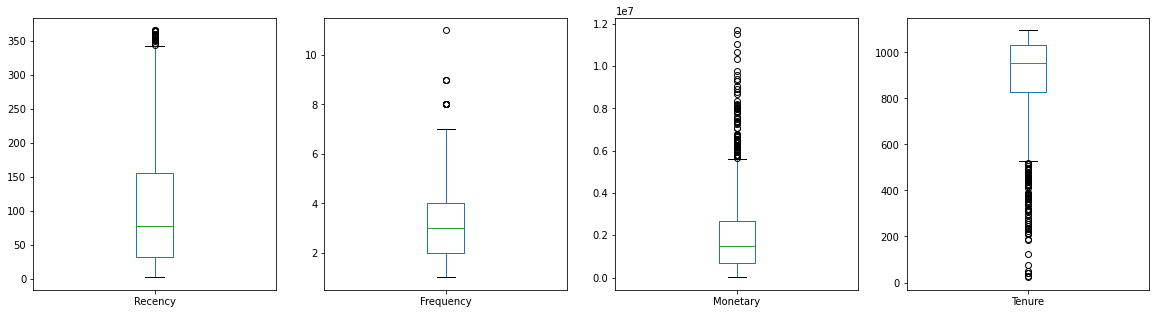

In [ ]:
# filter numeric column
col_list = ['Recency','Frequency','Monetary','Tenure']

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = rfmt_df_2021.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

<Figure size 720x504 with 0 Axes>

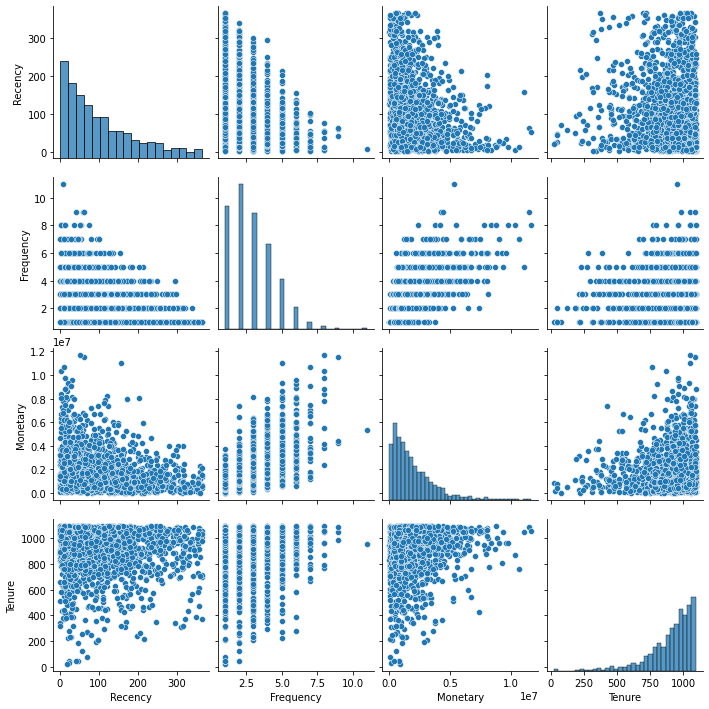

In [ ]:
# Check Distribution
plt.figure(figsize = (10,7))
sns.pairplot(data = rfmt_df_2021[['Recency','Frequency','Monetary','Tenure']])

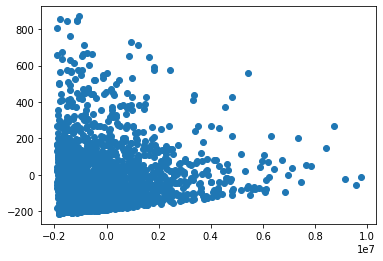

In [ ]:
features = ['Recency','Frequency','Monetary','Tenure']

pca_df = rfmt_df_2021.copy()

pca = decomposition.PCA()
pca_df['x'] = pca.fit_transform(pca_df[features])[:, 0]
pca_df['y'] = pca.fit_transform(pca_df[features])[:, 1]
plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

### Cluster Analysis using K-Means

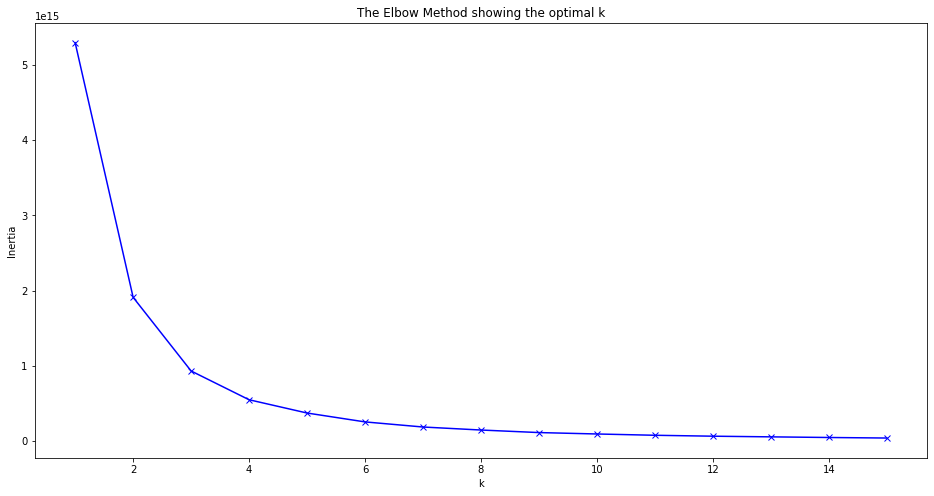

[5292323024577288.0, 1909275567098297.0, 930929058096351.6, 548655400450382.4, 372333221203902.75, 254322735065144.88, 186528483030838.88, 146467580528310.88, 112695889624623.8, 93953898314683.72, 76755215982278.42, 64507255395945.6, 55747396790753.44, 47279442030539.44, 40104222973722.984]


In [ ]:
distortions = []
K = range(1,16)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeanModel.fit(rfmt_df_2021[['Recency','Frequency','Monetary','Tenure']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

From graph above, we can see that **potential cluster are 2, 3, 4**. Now, we check with Silhouette Analysis.

For n_clusters = 2 The average silhouette_score is : 0.6445909448508044
For n_clusters = 3 The average silhouette_score is : 0.6165934696585127
For n_clusters = 4 The average silhouette_score is : 0.5817460337927756
For n_clusters = 5 The average silhouette_score is : 0.5644020189782286


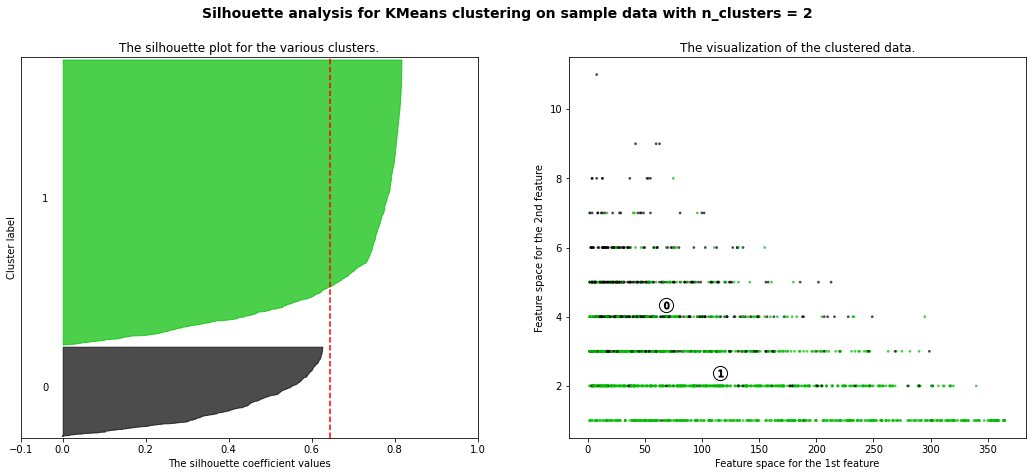

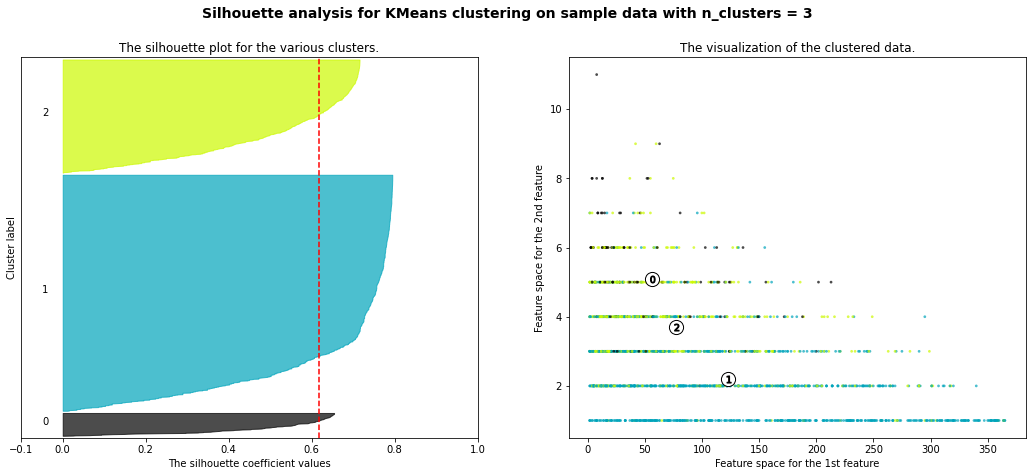

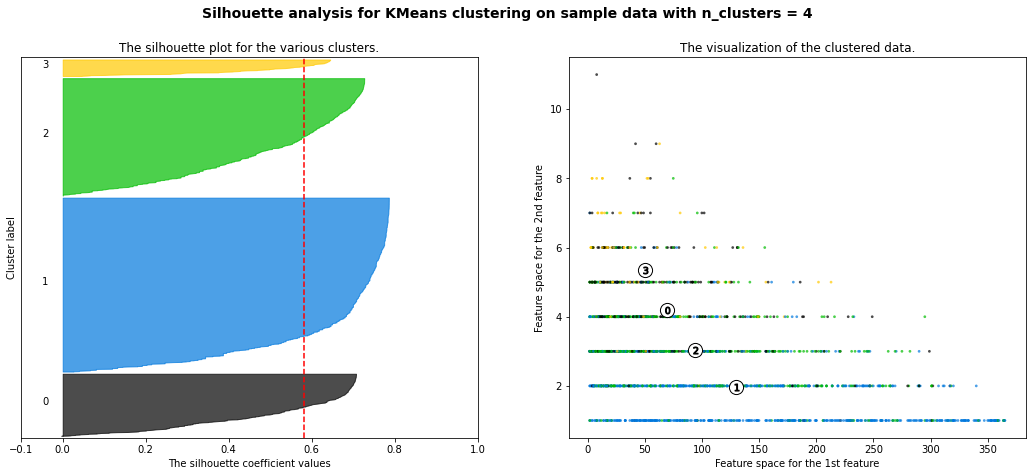

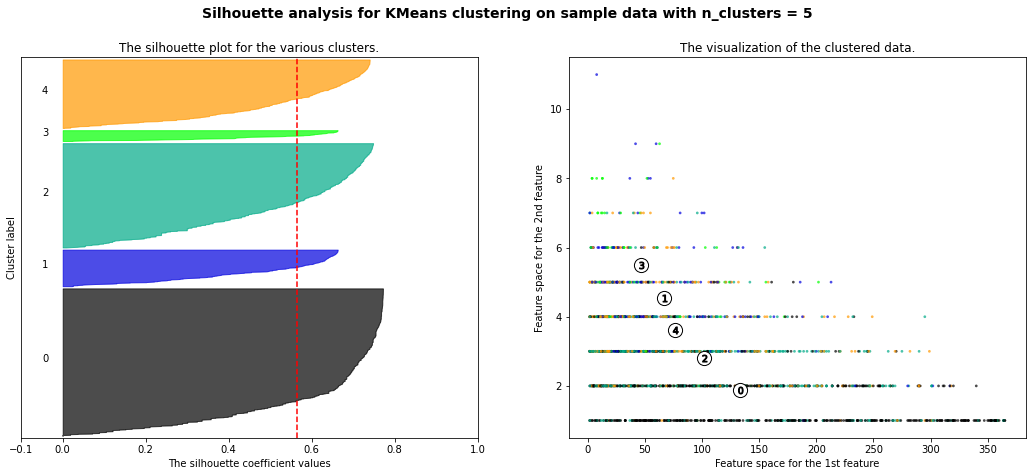

In [ ]:
silhoutte_analysis(rfmt_df_2021[['Recency','Frequency','Monetary','Tenure']],list(range(2,6)))

From analysis above, we consider **3 is best clusters** because most of silhouette are pass average score and have 2nd highest score.

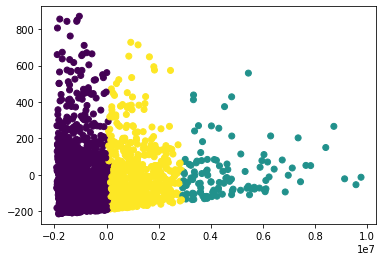

In [ ]:
features = ['Recency','Frequency','Monetary','Tenure']

# Let's try arbitrarily 3 clusters 
km = cluster.KMeans(n_clusters=3)
rfmt_df_2021['cluster'] = km.fit_predict(rfmt_df_2021[features])

# Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set.
# Principal Component Analysis (PCA) is used for Visualizing High-Dimensional Data.
pca = decomposition.PCA()
rfmt_df_2021['x'] = pca.fit_transform(rfmt_df_2021[features])[:, 0]
rfmt_df_2021['y'] = pca.fit_transform(rfmt_df_2021[features])[:, 1]
plt.scatter(rfmt_df_2021['x'], rfmt_df_2021['y'], c=rfmt_df_2021['cluster'])
plt.show()

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3, random_state = 42)
cluster_model.fit(rfmt_df_2021[['Recency','Frequency','Monetary','Tenure']])
cluster_label = cluster_model.labels_
rfmt_df_2021['cluster'] = cluster_label
rfmt_df_2021

,User ID,Recency,Tenure,Frequency,Monetary,cluster,x,y
0,10000,41,883,1,3215000,2,1.295719e+06,41.696114
1,10001,64,541,2,3160000,2,1.240719e+06,382.454794
2,10002,89,988,4,4540000,2,2.620719e+06,-45.769265
3,10003,231,1064,1,1350000,1,-5.692813e+05,-168.641061
4,10004,28,863,2,1710000,1,-2.092813e+05,41.037887
...,...,...,...,...,...,...,...,...
1840,20696,36,1006,4,3115000,2,1.195719e+06,-82.578957
1841,20697,292,1065,1,1320000,1,-5.992813e+05,-171.173566
1842,20698,81,961,4,7240000,0,5.320719e+06,18.855267
1843,20699,302,1067,1,1560000,1,-3.592813e+05,-170.024422


<Figure size 720x504 with 0 Axes>

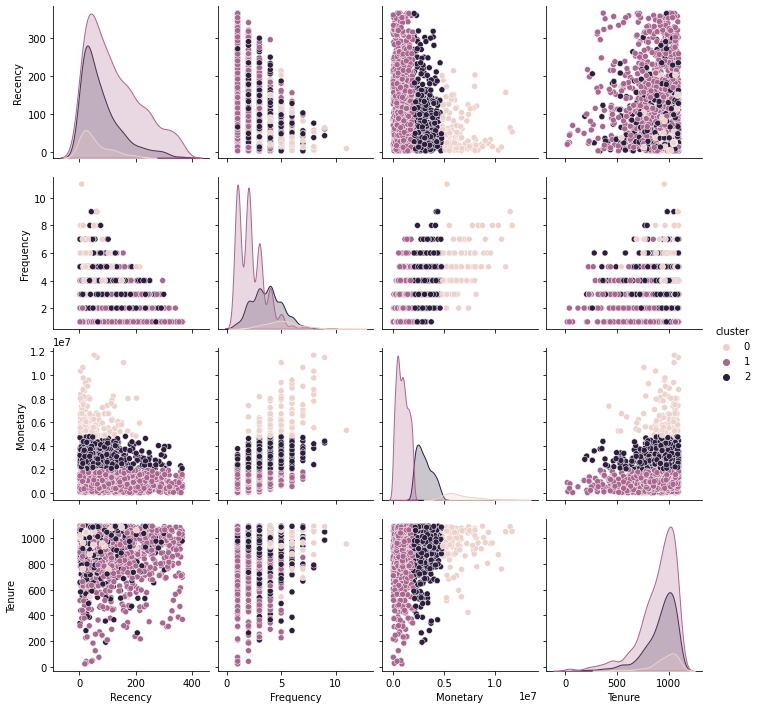

In [ ]:
# Check
plt.figure(figsize = (10,7))
sns.pairplot(
    data = rfmt_df_2021[['Recency','Frequency','Monetary','Tenure','cluster']],
    hue = 'cluster'
)

In [ ]:
cluster_descstat = pd.DataFrame(rfmt_df_2021.groupby(['cluster'])['Recency','Frequency','Monetary','Tenure'].agg(['count','min','max','mean','median']))
cluster_descstat = round(cluster_descstat,3)
cluster_descstat

Recency                          Frequency                        \
          count min  max     mean median     count min max   mean median   
cluster                                                                    
0           114   3  213   56.211   37.5       114   2  11  5.096    5.0   
1          1170   2  365  122.674  101.0      1170   1   7  2.202    2.0   
2           561   2  364   77.021   55.0       561   1   9  3.695    4.0   

        Monetary                                            Tenure             \
           count      min       max         mean     median  count  min   max   
cluster                                                                         
0            114  4825000  11690000  6573880.702  6096000.0    114  424  1096   
1           1170     5000   1982000   920710.940   880000.0   1170   22  1096   
2            561  1990000   4800000  3056006.774  2920000.0    561  191  1096   

                         
            mean median  
cluster                  
0        958.149  997.0  
1        893.690  944.5  
2        919.588  964.0

In [ ]:
from google.colab import files
rfmt_df_2021.to_csv('rfmt_df_2021.csv', encoding = 'utf-8-sig')
files.download('rfmt_df_2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rfmt_df_2021.nunique()

User ID      1845
Recency       327
Tenure        536
Frequency      10
Monetary      817
cluster         3
x            1845
y            1845
dtype: int64

> Check cluster

In [ ]:
dtes = pd.read_csv('/content/rfmt_df_2021.csv')
dtes

FileNotFoundError: ignored

In [ ]:
d = dtes[['User ID','cluster']]

d = rfmt_df_2021[['User ID','cluster']].merge(d,how='inner',on='User ID')
d

In [ ]:
d['cek'] = d['cluster_x'] == d['cluster_y']
d

In [ ]:
d['cek'].value_counts()